In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import folium
from folium.plugins import FastMarkerCluster

In [2]:
dfClean = pd.read_csv('data/compiledData/dfCleanMortes.csv')


dfClean['SEXO_PESSOA_R'] = dfClean['SEXO_PESSOA'].str.strip().str.lower().replace('indefinido',np.nan)

dfClean['IDADE_PESSOA_R'] = dfClean['IDADE_PESSOA'].replace('NÃO INFORMADO',np.nan).astype(float)



dfClean.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,ID_DELEGACIA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,...,LAT_LONG,RESPONSE_GEOLOCATOR,GEOLOCATOR_ADDRESS,GEOLOCATOR_NEIGHBORHOOD,GEOLOCATOR_POSTCODE,ZONE_FROM_POSTCODE,BO_ANO,NUM_VITIMAS_CRIME,SEXO_PESSOA_R,IDADE_PESSOA_R
0,DECAP,1ª SEC,São Paulo,001 DP - Sé,10108,2019-01-01 07:56:59,3,2019,S.PAULO,08º D.P. BRAS,...,"-23.5462154481364,-46.631733309032","Rua Vinte e Cinco de Março, Sé, São Paulo, Reg...","{'road': 'Rua Vinte e Cinco de Março', 'suburb...",SÉ,01015-020,Centro,3-2019,1,masculino,62.0
1,DECAP,1ª SEC,São Paulo,001 DP - Sé,10101,2019-01-18 16:32:41,372,2019,S.PAULO,01º D.P. SE,...,"-23.5546896292896,-46.6296510483604","Vila Suíça, Sé, São Paulo, Região Imediata de ...","{'road': 'Vila Suíça', 'suburb': 'Sé', 'city':...",SÉ,01514-020,Centro,372-2019,1,masculino,44.0
2,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-20 00:15:18,534,2019,S.PAULO,78º D.P. JARDINS,...,"-23.560415289045,-46.6337071030673","Rua São Joaquim, Liberdade, São Paulo, Região ...","{'road': 'Rua São Joaquim', 'suburb': 'Liberda...",LIBERDADE,01511-001,Centro,534-2019,2,masculino,40.0
3,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-23 00:07:25,624,2019,S.PAULO,78º D.P. JARDINS,...,"-23.5629637062019,-46.6455014429631","1627, Avenida Brigadeiro Luís Antônio, Bela Vi...","{'house_number': '1627', 'road': 'Avenida Brig...",BELA VISTA,01318-002,Centro,624-2019,2,feminino,57.0
4,DECAP,2ª SEC,São Paulo,095 DP - Heliópolis,10358,2019-01-24 11:54:50,259,2019,S.PAULO,95º D.P. HELIÓPOLIS,...,"-23.6075347234928,-46.595687674394","Rua Cônego Xavier, Vila Heliópolis, Sacomã, Sã...","{'road': 'Rua Cônego Xavier', 'suburb': 'Vila ...",VILA HELIÓPOLIS,04232-000,Zona Sul,259-2019,1,masculino,25.0


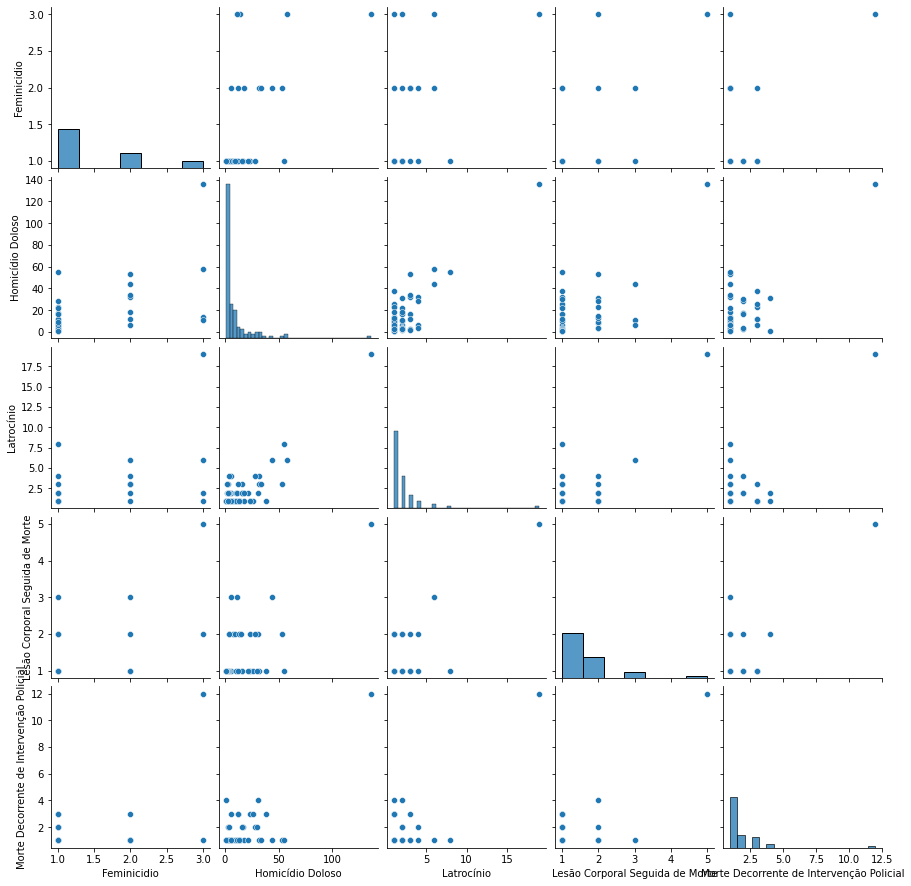

In [3]:
pivotTable = pd.pivot_table(dfClean,index=["GEOLOCATOR_NEIGHBORHOOD"],values=["ANO_BO"],aggfunc='count',columns=["CRIME"])

dfCrimesNeighborhood = pivotTable.droplevel(0, axis=1).reset_index()

sns.pairplot(dfCrimesNeighborhood)
plt.show()

<AxesSubplot:xlabel='CRIME', ylabel='IDADE_PESSOA_R'>

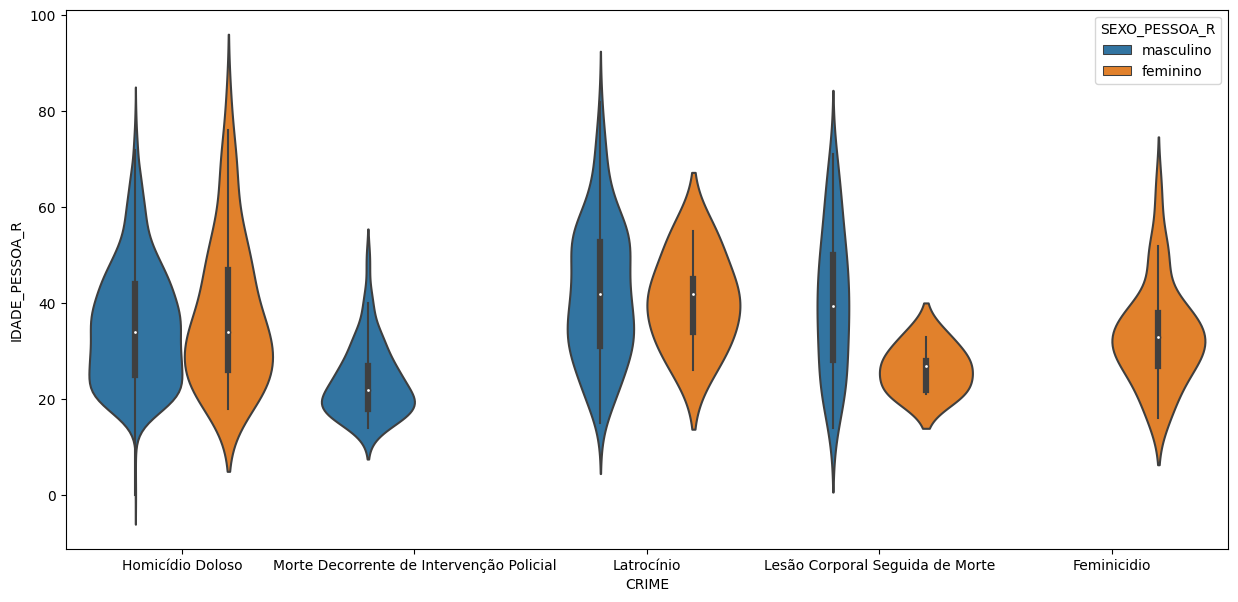

In [4]:
fig, ax = plt.subplots(figsize=(15,7))

sns.violinplot(data=dfClean, x="CRIME", y="IDADE_PESSOA_R", hue="SEXO_PESSOA_R")


In [5]:
dfClean['HORA_CERTA'] = pd.to_datetime(dfClean.HORA_FATO,errors='coerce')
dfClean['SEGUNDOS_DIA'] = (dfClean['HORA_CERTA'].dt.hour*3600)+(dfClean['HORA_CERTA'].dt.minute*60)+(dfClean['HORA_CERTA'].dt.second)

In [6]:
fig = px.scatter(dfClean, x="SEGUNDOS_DIA", y="IDADE_PESSOA_R",color='SEXO_PESSOA_R')
fig.show()

In [7]:
fig = px.scatter(dfClean, x="SEGUNDOS_DIA", y="IDADE_PESSOA_R",color='CRIME')
fig.show()

In [8]:
dfClean.DIA_SEMANA_FATO = dfClean.DIA_SEMANA_FATO.astype(str).map({'0':'2a','1':'3a','2':'4a','3':'5a','4':'6a','5':'Sab','6':'Dom'})
fig = px.scatter(dfClean, x="SEGUNDOS_DIA", y="IDADE_PESSOA_R",color='DIA_SEMANA_FATO')
fig.show()

In [9]:

fig = px.scatter(dfClean, x="LATITUDE", y="LONGITUDE",color='CRIME')

fig.show()

In [10]:
sns.color_palette('pastel')[:5]

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0)]

In [31]:
colorDict = {'Feminicidio':'blue',
            'Homicídio Doloso':'orange',
            'Morte Decorrente de Intervenção Policial':'purple',
            'Latrocínio':'green',
            'Lesão Corporal Seguida de Morte':'red'}

dfClean['COLOR'] = dfClean['CRIME']
dfClean['COLOR'] = dfClean['COLOR'].map(colorDict)

In [32]:
dfClean['COLOR']

0       orange
1       orange
2       orange
3       orange
4       orange
         ...  
1633      blue
1634      blue
1635      blue
1636      blue
1637      blue
Name: COLOR, Length: 1638, dtype: object

In [37]:
start_lat_lon=[-23.58633467412642, -46.60418260319519]

my_map = folium.Map(location=start_lat_lon, zoom_start=10)
# add all the point from the file to the map object using FastMarkerCluster

for lat,lon,color in zip(dfClean['LATITUDE'], dfClean['LONGITUDE'],dfClean['COLOR']):
    folium.Circle( location=[ lat, lon],fill=True, fill_color=color, radius=500,fill_opacity=1, stroke=False).add_to(my_map)
my_map

In [65]:
import folium
mapit = None
latlon = [ (51.249443914705175, -0.13878830247011467), (51.249443914705175, -0.13878830247011467), (51.249768239976866, -2.8610415615063034)]
for coord in latlon:
    mapit = folium.Map( location=[ coord[0], coord[1] ] )

mapit